In [ ]:
# Revisão de Python

nome = "Paulo"
sobrenome = "Salvatore"

print(nome + " " + sobrenome)

print(nome, sobrenome)

print(f"{nome} {sobrenome}")

Paulo Salvatore
Paulo Salvatore
Paulo Salvatore


In [ ]:
print(1200)

1200


In [ ]:
nome = "Paulo" # str -> string -> texto
numero = 5 # int -> integer -> inteiro -> números inteiros
numero_decimal = 5.2 # float -> números decimais

print(nome, type(nome))
print(numero, type(numero))
print(numero_decimal, type(numero_decimal))

Paulo <class 'str'>
5 <class 'int'>
5.2 <class 'float'>


In [ ]:
lista = [10, 20, 30]
#        0   1   2

print(lista, type(lista))

primeiro_elemento = lista[0]
print(primeiro_elemento, type(primeiro_elemento))

print("Lista antes", lista)
lista[1] = 40
print("Lista depois", lista)

[10, 20, 30] <class 'list'>
10 <class 'int'>
Lista antes [10, 20, 30]
Lista depois [10, 40, 30]


In [ ]:
tupla = (50, 60, 70)

print(tupla, type(tupla))

primeiro_elemento = tupla[0]
print(primeiro_elemento, type(primeiro_elemento))

outra_tupla = 100,
print(outra_tupla, type(outra_tupla))

(50, 60, 70) <class 'tuple'>
50 <class 'int'>
(100,) <class 'tuple'>


In [ ]:
# Rede Neural

# Importar todas as dependências e bibliotecas que utilizaremos

from tensorflow import keras # Importar a biblioteca Keras

from keras.datasets import mnist # Base de dados MNIST - 60k imagens treino, 10k imagens teste

from tensorflow.python.keras import Sequential # Arquitetura da nossa rede neural
from tensorflow.python.keras.layers import Dense, Dropout # Dense = Camada/Neurônio (base da rede) e Regularizador (evita overfitting)
# from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (backpropagation)
from tensorflow.python.keras.optimizer_v2.rmsprop import RMSprop # Otimizador (backpropagation)

In [ ]:
# Download do MNIST

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

# X_Treino -> 60k imagens, 28x28 pixels
# Y_Treino -> 60k labels, contendo o número que está desenhado na imagem

# X_Teste -> 10k imagens, 28x28 pixels
# Y_Teste -> 10k labels, contendo o número que está desenhado na imagem

In [ ]:
# Após importar os dados, é importante dar uma analisada para ver o que temos no dataset
# e como ele está estruturado

print("Quantidade de imagens para treino:", len(x_treino))
print("Quantidade de imagens para teste:", len(x_teste))

print("Tipo de x_treino:", type(x_treino))

primeira_imagem = x_treino[0]

representacao_primeira_imagem = y_treino[0]

print("A imagem x_treino[0] representa o número", representacao_primeira_imagem)

print("Formato da primeira imagem:", primeira_imagem.shape, type(primeira_imagem.shape))

print(primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo de x_treino: <class 'numpy.ndarray'>
A imagem x_treino[0] representa o número 5
Formato da primeira imagem: (28, 28) <class 'tuple'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225

A imagem representa: 7


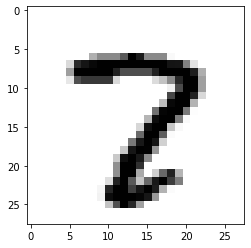

In [ ]:
import matplotlib.pyplot as plt

indice = 12000

print("A imagem representa:", y_treino[indice])

plt.imshow(x_treino[indice], cmap=plt.cm.binary)

In [ ]:
# Fluxo para construção da rede neural
# 1 - Organizar a camada de entrada (input)
# 2 - Organizar a camada de saída (output)
# 3 - Estruturar a nossa rede neural
# 4 - Treinar o modelo
# 5 - Fazer as previsões

In [ ]:
# 1 - Organizar a camada de entrada (input)

# Achatando a matriz de pixels e transformar em uma única lista

quantidade_treino = len(x_treino) # 60000
quantidade_teste = len(x_teste) # 10000

resolucao_imagem = x_treino[0].shape # (28, 28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [ ]:
print("Quantidade de itens em x_treino[0]:", len(x_treino[0]))

# Como será que ficou x_treino[0]?
print(x_treino[0])

Quantidade de itens em x_treino[0]: 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 25

In [ ]:
# Normalização de dados - explicação

# 255 vire 1
# 127 vire 0.5
# 0 vire 0
# E assim por diante...

# Posso pegar o meu valor que quero transformar e dividir pelo valor máximo do meu intervalo
# Exemplo, se eu dividir 255 por 255, tenho 1
# Exemplo, se eu dividir 127 por 255, tenho ~0.5
# Exemplo, se eu dividir 0 por 255, tenho 0
# E assim por diante...

primeira_imagem = x_treino[0]

print(primeira_imagem[160], type(primeira_imagem[160]))

pixel_imagem = primeira_imagem[160]
print(pixel_imagem / 255, type(pixel_imagem / 255))

"""
# Explicando o porque da conversão de tipos

primeira_imagem = x_treino[0]
primeiro_pixel = primeira_imagem[0] # uint8

# Quando eu divido uint8 por algum número, recebemos um float64
# Porém, o tensorflow precisa de float32 para trabalhar
# Portanto, precisamos converter o tipo antes de dividí-lo

print(primeiro_pixel, type(primeiro_pixel / 255)) # float64

# Fim da explicação
"""

166 <class 'numpy.uint8'>
0.6509803921568628 <class 'numpy.float64'>


'\n# Explicando o porque da conversão de tipos\n\nprimeira_imagem = x_treino[0]\nprimeiro_pixel = primeira_imagem[0] # uint8\n\n# Quando eu divido uint8 por algum número, recebemos um float64\n# Porém, o tensorflow precisa de float32 para trabalhar\n# Portanto, precisamos converter o tipo antes de dividí-lo\n\nprint(primeiro_pixel, type(primeiro_pixel / 255)) # float64\n\n# Fim da explicação\n'

In [ ]:
# Normalização dos dados - implementação

# Conversão dos tipos

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

# Normalizar, transformando 255 para 1 e assim por diante

x_treino /= 255 # Divide todos os 60000 valores de x_treino por 255 e armazena esse resultado em x_treino
x_teste /= 255 # Divide todos os 10000 valores de x_teste por 255 e armazena esse resultado em x_teste

In [ ]:
# Como está o pixel 160 da primeira imagem de x_treino?
print(x_treino[0][160], type(x_treino[0][160]))

print(x_treino[0])

0.6509804 <class 'numpy.float32'>
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        

In [ ]:
# 2 - Organizar a camada de saída (output)

# Preparação da camada de saída

# Quais são as possibilidades de saída? Números de 0 a 9
# Atualmente, nas labels, temos: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
# Transformaremos para o formato da camada de saída [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Sendo que cada número possui um espaço reservado para ele na lista de possibilidades
# Se nesse espaço reservado tivermos um resultado igual a 1, significa que aquele número foi identificado
# Exemplo
# Número 5 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# Número 9 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
# Número 0 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

print("Primeiro elemento:", y_treino[0], type(y_treino[0]))

valores_unicos = set(y_treino)

print("Valores únicos", valores_unicos)

quantidade_valores_unicos = len(valores_unicos) # 10


print("O que temos em y_treino (antes)?", y_treino)

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print("O que temos em y_treino (depois)?", y_treino)

Primeiro elemento: 5 <class 'numpy.uint8'>
Valores únicos {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
O que temos em y_treino (antes)? [5 0 4 ... 5 6 8]
O que temos em y_treino (depois)? [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
# 3 - Estruturar a nossa rede neural
# 4 - Treinar o modelo
# 5 - Fazer as previsões

In [ ]:
# 3 - Estruturar a nossa rede neural

model = Sequential()

# Primeira hidden layer
# 30 neurônios
# Função de ativação: ReLU
# Como estamos na primeira hidden layer, precisamos definir o input shape

model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

# Adicionamos um regularizador, que ajuda a evitar o overfitting
# Overfitting = quando a rede aprender a resolver aquela base específica, mas não
# abstrai o problema de forma suficiente para resolver imagens que ela não conhece

model.add(Dropout(0.2))

# Segunda hidden layer
# 20 neurônios
# Função de ativação: ReLU

model.add(Dense(20, activation='relu'))

# Mais um regularizador depois da segunda hidden layer

model.add(Dropout(0.2))

# Finalizamos com a camada de saída (output)

model.add(Dense(quantidade_valores_unicos, activation='softmax'))

# Exibimos o resumo do modelo criado

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compila e treina o modelo
# Definimos a função de erro
# Definimos o otimizador
# Definimos a métrica de aprendizado

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Treinamos o modelo

# Imagens em treino, label em treino
# Batch Size = 128
# Epochs = 10 - Quantas épocas irei treinar (cada época passa o dataset inteiro pela rede neural)
# Verbose = Quando ativada, exibe informações do treinamento
# Imagens em teste, labels em teste

history = model.fit(x_treino, y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.8404 - accuracy: 0.7353 - val_loss: 0.3014 - val_accuracy: 0.9157
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4510 - accuracy: 0.8673 - val_loss: 0.2311 - val_accuracy: 0.9349
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3878 - accuracy: 0.8862 - val_loss: 0.2157 - val_accuracy: 0.9365
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3515 - accuracy: 0.8991 - val_loss: 0.1953 - val_accuracy: 0.9440
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 0.9056 - val_loss: 0.1940 - val_accuracy: 0.9433
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3070 - accuracy: 0.9111 - val_loss: 0.1830 - val_accuracy: 0.9472
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2940 - accuracy: 0.9160 - val_loss: 0.1730 - val_accuracy: 0.9516
Epoch 

Valor categórico em y_teste[indice]: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Previsão [[9.9986815e-01 1.2218812e-11 6.9408932e-05 6.7996530e-06 2.0339767e-08
  4.0190964e-05 4.8056777e-06 1.8409581e-08 2.2299914e-06 8.3639952e-06]]
Previsão ajustada: [0]



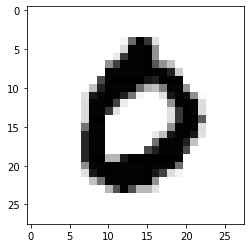

Valor categórico em y_teste[indice]: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

Previsão [[1.2650974e-05 3.6158297e-06 7.1443897e-04 7.5566233e-05 9.7135812e-01
  1.1422250e-05 4.3469399e-06 1.8466682e-03 1.0394980e-03 2.4933809e-02]]
Previsão ajustada: [4]



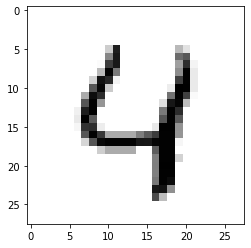

Valor categórico em y_teste[indice]: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

Previsão [[2.0682346e-10 9.9917322e-01 8.2291379e-05 4.6099871e-05 4.5940446e-06
  1.3211903e-05 1.4855652e-06 1.8146705e-04 4.9699482e-04 5.3510195e-07]]
Previsão ajustada: [1]



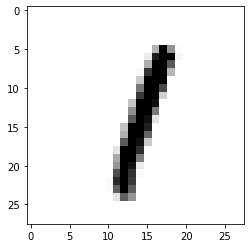

In [ ]:
# Fazendo as nossas previsões
for indice in range(3, 6):
  # indice = 1

  print("Valor categórico em y_teste[indice]:", y_teste[indice])

  # Preparar a imagem para fazer a previsão

  imagem = x_teste[indice].reshape((1, resolucao_total))

  print()

  # Faço a previsão

  prediction = model.predict(imagem)
  print("Previsão", prediction)

  # Traduzindo a previsão em algo mais legível
  import numpy as np
  prediction_class = np.argmax(prediction, axis=-1)
  print("Previsão ajustada:", prediction_class)

  print()

  (x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
  plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)
  plt.show()